<a href="https://colab.research.google.com/github/Francesca-Rossi/ITA_university_advisor/blob/main/GetDataFromGoogleSheet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importazione librerie

In [2128]:
import gspread 
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
import os
from oauth2client.service_account import ServiceAccountCredentials
from google.colab import drive
from nltk.corpus import stopwords
from nltk.stem.snowball import ItalianStemmer
import json as js


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#COLLEGAMENTO CON IL GOOGLE SHEET 

In [2129]:
SCOPES = ["https://spreadsheets.google.com/feeds",
                  "https://www.googleapis.com/auth/spreadsheets",
                  "https://www.googleapis.com/auth/drive",
                  "https://www.googleapis.com/auth/drive"]

In [2130]:
drive.mount('/content/drive')
os.chdir("/content/drive/My Drive/Colab Notebooks/big data proj")
os.listdir()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['GoogleSheetCredentials.json']

In [2131]:
cred = ServiceAccountCredentials.from_json_keyfile_name("/content/drive/My Drive/Colab Notebooks/big data proj/GoogleSheetCredentials.json", SCOPES)

In [2132]:
gclient = gspread.authorize(cred)

In [2133]:
sheet = gclient.open_by_url("https://docs.google.com/spreadsheets/d/1scMc0UlNC1pdZNow5k3pLhofcW6j4ekXyxYlNiBcueI/edit?usp=sharing")

# RECUPERO FOGLI E SALVATAGGIO IN DATAFRAME

In [2134]:
students_data = sheet.worksheet('Laureando').get_all_records()
graduate_data = sheet.worksheet('Laureato').get_all_records()

In [2135]:
df_students = pd.DataFrame(students_data)
#print(df_students)

In [2136]:
df_graduate = pd.DataFrame(graduate_data)
#print(graduate_df)

#ANALISI VALORI MANCANTI

##Sostituzione celle vuote con valore 'Nan'

In [2137]:
df_students=df_students.replace('',np.NaN)
df_students.shape

(719, 89)

In [2138]:
df_graduate=df_graduate.replace('',np.NaN)
df_graduate.shape

(61, 85)

In [2139]:
df_missing_value_students=df_students.isnull().sum()

In [2140]:
df_missing_value_graduate=df_graduate.isnull().sum()

##STUDENTI: grafico valori mancanti

In [2141]:
#definizione delle variabili
tot_students=df_students.shape[0]
print(tot_students)
values_students=df_missing_value_students.values
index_students=df_missing_value_students.index

719


In [2142]:
#gestione dei colori
clrs=[]
x_perc_values=[]
for x in values_students:
  x_perc= (x/tot_students)*100
  if (x_perc<=75):
    clrs.append('g') #green when missing value < 75%
  elif (x_perc>75) and (x_perc<=85):
    clrs.append('y')
  else:
    clrs.append('r')


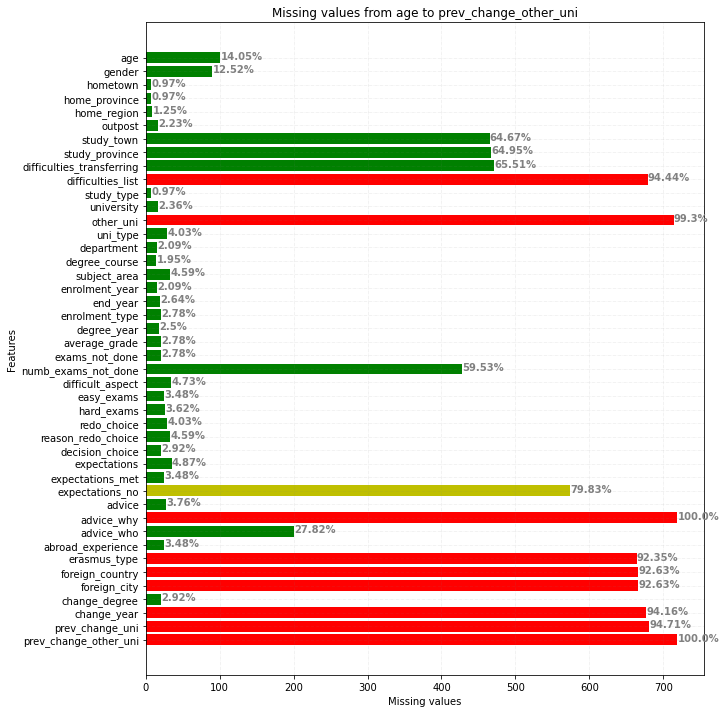

0 44


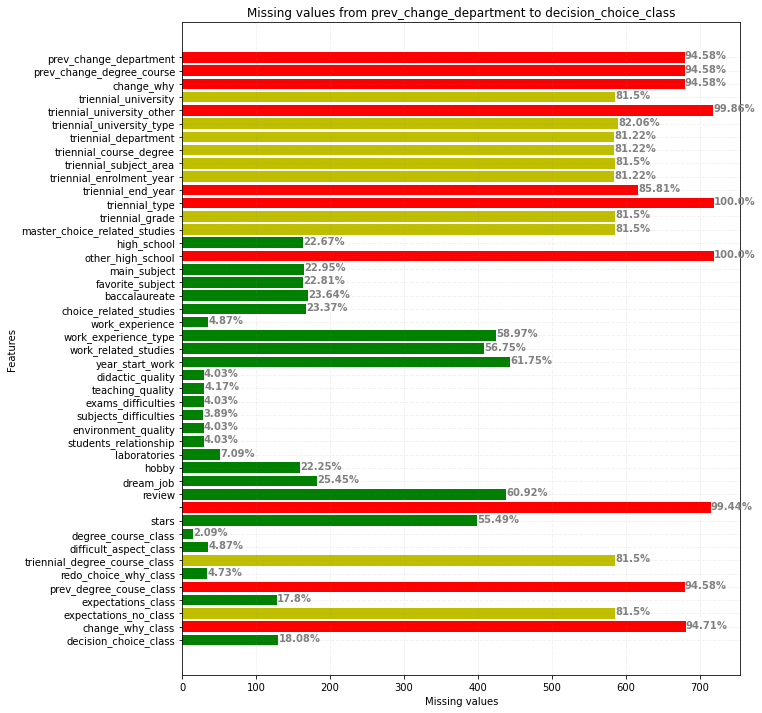

44 89


In [2143]:
#creazione del grafico
start=0
for i in range(2, 0, -1):
  fig, ax = plt.subplots(figsize =(10, 12))
  end= int(len(index_students)/i)
  title_str=f'Missing values from {index_students[start]} to {index_students[end-1]}'
  # Horizontal Bar Plot
  #clrs = ['g' if (((x/tot_students)*100) < 80)   if (((x/tot_students)*100) < 90 ) 'y'  else 'r' for x in values[x:end] ]
  ax.barh(index_students[start:end], values_students[start:end], color=clrs[start:end])
  # Add x, y gridlines
  ax.grid(b = True, color ='grey',
          linestyle ='-.', linewidth = 0.5,
          alpha = 0.2)
  # Add annotation to bars
  for i in ax.patches:
      plt.text(i.get_width()+0.2, i.get_y()+0.5,
              str(round(((i.get_width()/tot_students)*100), 2))+'%',
              fontsize = 10, fontweight ='bold',
              color ='grey') 
  # Show top values
  ax.invert_yaxis()
  #labeling
  plt.xlabel("Missing values")
  plt.ylabel("Features")
  plt.title(title_str)
  plt.show()
  print(start, end)
  start=end

##LAUREATI:grafico valori mancanti

In [2144]:
#definizione delle variabili
tot_graduate=df_graduate.shape[0]
print(tot_graduate)
values_graduate=df_missing_value_graduate.values
index_graduate=df_missing_value_graduate.index

61


In [2145]:
#gestione dei colori
clrs=[]
x_perc_values=[]
for x in values_graduate:
  x_perc= (x/tot_graduate)*100
  if (x_perc<=75):
    clrs.append('g') #green when missing value < 75%
  elif (x_perc>75) and (x_perc<=85):
    clrs.append('y')
  else:
    clrs.append('r')

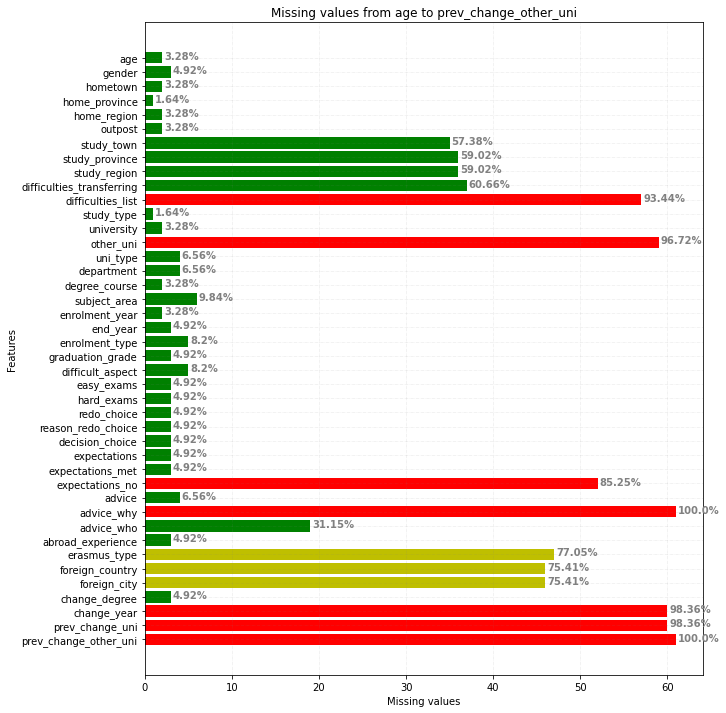

0 42


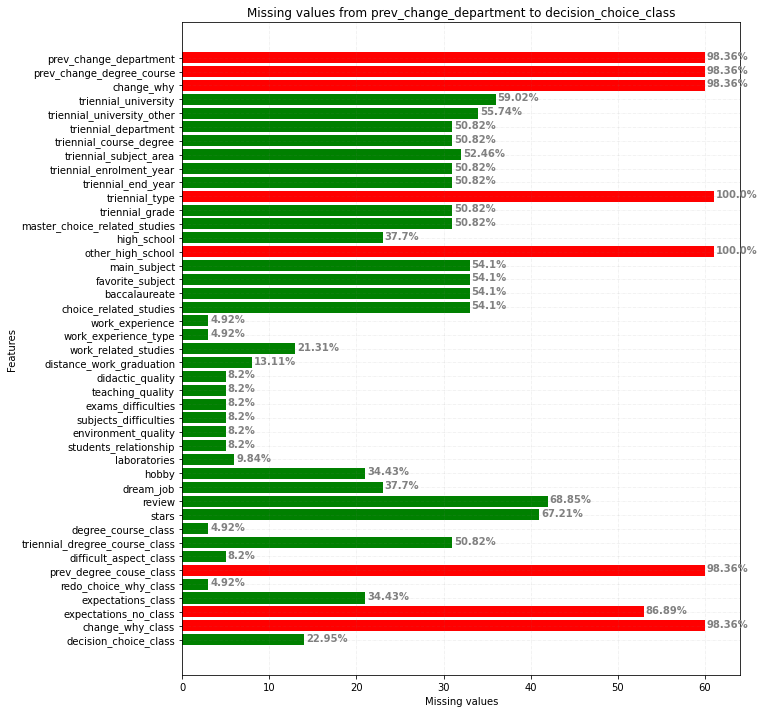

42 85


In [2146]:
#creazione del grafico
start=0
for i in range(2, 0, -1):
  fig, ax = plt.subplots(figsize =(10, 12))
  end= int(len(index_graduate)/i)
  title_str=f'Missing values from {index_graduate[start]} to {index_graduate[end-1]}'
  # Horizontal Bar Plot
  #clrs = ['g' if (((x/tot_students)*100) < 80)   if (((x/tot_students)*100) < 90 ) 'y'  else 'r' for x in values[x:end] ]
  ax.barh(index_graduate[start:end], values_graduate[start:end], color=clrs[start:end])
  # Add x, y gridlines
  ax.grid(b = True, color ='grey',
          linestyle ='-.', linewidth = 0.5,
          alpha = 0.2)
  # Add annotation to bars
  for i in ax.patches:
      plt.text(i.get_width()+0.2, i.get_y()+0.5,
              str(round(((i.get_width()/tot_graduate)*100), 2))+'%',
              fontsize = 10, fontweight ='bold',
              color ='grey') 
  # Show top values
  ax.invert_yaxis()
  #labeling
  plt.xlabel("Missing values")
  plt.ylabel("Features")
  plt.title(title_str)
  plt.show()
  print(start, end)
  start=end

#GESTIONE VALORI MANCANTI NELLA COLONNA UNIVERSITA'

##Studenti

###1 - Sostituzione altro con valore 'Nan'

In [2147]:
df_students['university']=df_students['university'].replace('altro', np.NaN ) #necessario per effettuare merge tra 2 colonne
df_students.shape

(719, 89)

In [2148]:
#TODO remove [fra]
df_students[['university', 'other_uni']].head(50) #codice di controllo

,university,other_uni
0,Politecnico di MILANO,NaN
1,Università degli Studi di NAPOLI Federico II,NaN
2,Università degli Studi di ROMA La Sapienza,NaN
3,Università degli Studi di ROMA La Sapienza,NaN
4,Università degli Studi di CAGLIARI,NaN
5,Università degli Studi di PARMA,NaN
6,NaN,"Civica Scuola di Cinema ""Luchino Visconti"""
7,Università degli Studi di BOLOGNA,NaN
8,Università degli Studi di PARMA,NaN
9,Università degli Studi di PARMA,NaN


###2- Merge tra la colonna university e other_uni per unire i valori mancanti in university

In [2149]:
df_students['university']=df_students['university'].combine_first(df_students['other_uni'])
#df_students['university'].head(50)

### 3 - Eliminazione delle righe che nonostante il merge presentano valori nulli nella colonna university

In [2150]:
df_students = df_students[df_students['university'].notna()]
df_students.shape

(696, 89)

##Laureati

### 1- Sostituzione altro con il valore 'Nan'

In [2151]:

df_graduate['university']=df_graduate['university'].replace('altro', np.NaN ) #per poter fare il merge tra due colonne
df_graduate.shape

(61, 85)

In [2152]:
#TODO remove [fra]
df_graduate.isnull().sum() #codice di controllo

age                       2
gender                    3
hometown                  2
home_province             1
home_region               2
                         ..
redo_choice_why_class     3
expectations_class       21
expectations_no_class    53
change_why_class         60
decision_choice_class    14
Length: 85, dtype: int64

In [2153]:
#TODO remove [fra]
df_graduate[['university', 'other_uni']].head(50) #codice di controllo

,university,other_uni
0,Università degli Studi di PARMA,NaN
1,Università degli Studi di PARMA,NaN
2,Università degli Studi di PARMA,NaN
3,Università degli Studi di PARMA,NaN
4,Università degli Studi di VERONA,NaN
5,Università degli Studi di MODENA e REGGIO EMILIA,NaN
6,Università degli Studi di PARMA,NaN
7,Università degli Studi di NAPOLI Federico II,NaN
8,Università degli Studi di PADOVA,NaN
9,Università degli Studi di ROMA Foro Italico,NaN


### 2- Merge tra colonna university e other_uni

In [2154]:
df_graduate['university']=df_graduate['university'].combine_first(df_graduate['other_uni'])
#df_graduate['university'].head(50)

###3- Eliminazione delle righe che contengono ancora 'Nan' nella colonna university

In [2155]:
df_graduate = df_graduate[df_graduate['university'].notna()]
df_graduate.shape

(57, 85)

#GESTIONE VALORI MANCANTI

###Colonna degree_course -> eliminazione celle nulle

In [2156]:
df_students = df_students[df_students['degree_course'].notna()]
df_students.shape

(690, 89)

In [2157]:
df_graduate = df_graduate[df_graduate['degree_course'].notna()]
df_graduate.shape

(57, 85)

#PREPROCESSING COLONNA DEGREE_COURSE

In [2158]:
#acronimi
slang_degree_course={"ctf":"chimica e tecnologie farmaceutiche",
       "clemi": "economia e marketing internazionale", 
       "sztpa": "scienze zootecniche e tecnologie delle produzioni animali", 
       "smid": "statistica matematica e trattamento informatico dati", 
       "clei": "economia internazionale",
       "clem": "economia e marketing", 
       "dams": "discipline delle arti della musica e dello spettacolo",
       "ctc": "chimica e tecnologie chimiche",
       "pmts": "planning management of tourism systems",
       "eifi":  "lingue moderne comunicazione cooperazione internazionale",
       "lms":  "letteratura musica spettacolo"
        }
#caratteri speciali
special_char=[',',"’","'",'<', '>', '.', '-', '_', '/', ': ', ' & ']

###Unisco i corsi di laurea dei due fogli

In [2159]:
#unisco studenti e laureati
all_degree_course=df_students['degree_course']
all_degree_course=all_degree_course.append(df_graduate['degree_course'])
all_degree_course.shape

(747,)

In [2160]:
#lo trasformo in frame se no mi genera dei problemi
all_degree_course=all_degree_course.to_frame()
#all_degree_course

In [2161]:
all_degree_course['clean_degree_course']=all_degree_course['degree_course']

In [2162]:
#metto in minuscolo
all_degree_course['clean_degree_course']=all_degree_course['clean_degree_course'].apply(lambda x: x.lower())
#df_students['degree_course'].head(50)

###Cleaning dei dati

In [2163]:
for key in slang_degree_course.keys():
  all_degree_course.loc[all_degree_course['clean_degree_course'].str.contains(key), 'clean_degree_course'] = slang_degree_course[key]
#df_students[['clean_degree_course','degree_course']].head(50)

In [2164]:
all_degree_course.loc[all_degree_course['clean_degree_course'].str.contains('medicina') & ~all_degree_course['clean_degree_course'].str.contains('veterinaria'), 'clean_degree_course'] = 'medicina e chirurgia'
all_degree_course.loc[all_degree_course['clean_degree_course'].str.contains('informatica') & all_degree_course['clean_degree_course'].str.contains('elettronica') & all_degree_course['clean_degree_course'].str.contains('telecomunicazioni') , 'clean_degree_course'] = 'ingegneria informatica elettronica e telecomunicazioni'
all_degree_course.loc[all_degree_course['clean_degree_course'].str.contains('comunicazione e media per le industrie creative'), 'clean_degree_course'] = 'comunicazione e media contemporanei per le industrie creative'
all_degree_course.loc[all_degree_course['clean_degree_course'].str.contains('elettronica') & ~all_degree_course['clean_degree_course'].str.contains('ingegneria' )& ~all_degree_course['clean_degree_course'].str.contains('ing'), 'clean_degree_course'] = 'ingegneria elettronica'
all_degree_course.loc[all_degree_course['clean_degree_course'].str.contains('interfacce e tecnologie della comunicazion'), 'clean_degree_course'] = 'interfacce uomo macchina e tecnologie della comunicazione'
all_degree_course.loc[all_degree_course['clean_degree_course'].str.contains('letteratura musica e spettacolo'), 'clean_degree_course'] = 'letteratura musica e spettacolo'
#df_students['clean_degree_course']

In [2165]:
#eliminare i corso di laurea
all_degree_course['clean_degree_course']=all_degree_course['clean_degree_course'].str.replace('corso di laurea', '')

In [2166]:
#rimozione di caratteri speciali
for i in range(0, len(special_char)):
  all_degree_course['clean_degree_course']=all_degree_course['clean_degree_course'].str.replace(special_char[i], ' ')
#df_students['degree_course'].head(50)

In [2167]:
all_degree_course['clean_degree_course']=all_degree_course['clean_degree_course'].str.replace(r'\sl.*[0-9]+', '') #lm19 , l-12
all_degree_course['clean_degree_course']=all_degree_course['clean_degree_course'].str.replace('ingegneria ', 'ing ')
all_degree_course['clean_degree_course']=all_degree_course['clean_degree_course'].str.replace('ingeneria ', 'ing ')
all_degree_course['clean_degree_course']=all_degree_course['clean_degree_course'].str.replace(' ciclo unico', '')
all_degree_course['clean_degree_course']=all_degree_course['clean_degree_course'].str.replace(r'\scurriculum\s.*', '')
all_degree_course['clean_degree_course']=all_degree_course['clean_degree_course'].str.replace(r'indirizzo.*', '')
all_degree_course['clean_degree_course']=all_degree_course['clean_degree_course'].str.replace(r'[(].*[)]*', '')
#df_students.loc[df_students['clean_degree_course'].str.contains(r'l.*[0-9]+'), 'clean_degree_course'] 

In [2168]:
#eliminazione spazi bianchi prima e dopo una stringa
all_degree_course['clean_degree_course']=all_degree_course['clean_degree_course'].str.strip()
#df_students['degree_course'].head(50)

In [2169]:
#elimino doppi spazi bianchi
all_degree_course['clean_degree_course']=all_degree_course['clean_degree_course'].str.replace('  ', ' ')

In [2170]:
# Split the sentences to lists of words.
all_degree_course['clean_degree_course'] = all_degree_course['clean_degree_course'].str.split()
all_degree_course['clean_degree_course'] 

0                                   [ing, aerospaziale]
1                              [economia, e, commercio]
2                              [medicina, e, chirurgia]
3                                 [psicologia, clinica]
4                              [medicina, e, chirurgia]
                            ...                        
56    [scienze, dell, educazione, scienze, pedagogic...
57                                   [scienze, motorie]
58                                  [servizio, sociale]
59                                   [ing, informatica]
60                     [beni, culturali, e, spettacolo]
Name: clean_degree_course, Length: 747, dtype: object

In [2171]:
stop_ita = stopwords.words('italian')
all_degree_course['clean_degree_course']=all_degree_course['clean_degree_course'].apply(lambda x: [item for item in x if item not in stop_ita])
#stop_ita

In [2172]:
stop_en = stopwords.words('english')
all_degree_course['clean_degree_course']=all_degree_course['clean_degree_course'].apply(lambda x: [item for item in x if item not in stop_en])
#stop_en

In [2173]:
stemmer = ItalianStemmer()
all_degree_course['clean_degree_course'] = all_degree_course['clean_degree_course'].apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word.
#df_students['clean_degree_course'] 

In [2174]:
#Ricompongo le frasi
all_degree_course['clean_degree_course']=all_degree_course['clean_degree_course'].apply(' '.join)

In [2175]:
#TODO remove fra (codice di prova)
all_degree_course[['clean_degree_course','degree_course']].head(50)

,clean_degree_course,degree_course
0,ing aerospazial,ingegneria aerospaziale
1,econom commerc,Economia e commercio
2,medicin chirurg,Medicina
3,psicolog clinic,Psicologia clinica
4,medicin chirurg,Medicina e chirurgia
5,infermierist,Infermieristica
6,montagg cinematograf televis,Montaggio Cinematografico e Televisivo
7,lingu cultur italian stranier,Lingua e cultura italiane per stranieri
8,profession sanitar,Professioni Sanitarie
9,matemat,Matematica


In [2176]:
unique_degree_course=np.unique(all_degree_course['clean_degree_course'])
print(len(unique_degree_course))
print(unique_degree_course)

268
['advanced sportsc manufacturing' 'amministr direzion aziendal'
 'amministr finanz' 'analis process social'
 'applied experimental psychological sciences' 'archeolog' 'architettur'
 'arti scienz spettacol' 'artificial intelligenc robotics'
 'autom industrial' 'automation control engineering' 'banc finanz'
 'ben artist spettacol' 'ben cultural' 'ben cultural spettacol'
 'bioingegner' 'biolog' 'biolog ecolog marin' 'biolog molecol'
 'biolog molecol applic nutrizion' 'biolog sperimental applic'
 'biomedical engineering' 'bionanotecnolog' 'biotecnolog'
 'biotecnolog medic' 'biotecnolog sicurezz qualit agro aliment' 'chimic'
 'chimic clinic forens sport' 'chimic industrial' 'chimic tecnolog chimic'
 'chimic tecnolog farmaceut' 'civilt lingu stran mod' 'computer scienc'
 'comun' 'comun impres risors uman'
 'comun med contemporane industr creativ' 'comun med pubblic'
 'cultur digital comun' 'dat scienc' 'design' 'design prodott industrial'
 'design prodott nautic' 'dietist' 'digital marke

#UNIONE UNIVERSITA'-LAUREA

In [2177]:
#TODO: remove francesca
#df_students['uni-course'] = df_students['university'].str.cat(df_students['degree_course'],sep=" ")
#df_students['uni-course']

In [2178]:
#df_graduate['uni-course'] = df_graduate['university'].str.cat(df_graduate['degree_course'],sep=" ")
#df_graduate['uni-course']

#DATI TRIENNALE E MAGISTRALE CICLO UNICO

<p>Selezionare le righe secondo una determinata condizione</p>
<a href="https://chrisalbon.com/python/data_wrangling/pandas_selecting_rows_on_conditions/"> https://chrisalbon.com/python/data_wrangling/pandas_selecting_rows_on_conditions/</a>

In [2179]:
df_students_first_degree = df_students.query('study_type == "Triennale" | study_type == "Magistrale_unico"')
#df_students_first_degree.isnull().sum()
df_students_first_degree.shape
#df_students_first_degree

(552, 89)

In [2180]:
df_graduate_first_degree = df_graduate.query('study_type == "Triennale" | study_type == "Magistrale_unico"')
#df_graduate_first_degree
df_graduate_first_degree.shape

(27, 85)

In [2181]:
#codice di controllo
#df_students_first_degree[df_students_first_degree['high_school'].isnull()]

##STUDENTI TRIENNALE E MAISTRALE A CICLO UNICO:grafico valori mancanti

In [2182]:
#definizione delle variabili
df_students_triennial_degree = df_students.query('study_type == "Triennale" | study_type == "Magistrale_unico"')
tot_triennial_students=df_students_triennial_degree.shape[0]
print(tot_triennial_students)

552


In [2183]:
df_missing_value_triennial_degree_students=df_students_triennial_degree.isnull().sum()
values=df_missing_value_triennial_degree_students.values
#print(values)
index=df_missing_value_triennial_degree_students.index
#print(index)

In [2184]:
#gestione dei colori
clrs=[]
x_perc_values=[]
for x in values:
  x_perc= (x/tot_triennial_students)*100
  if (x_perc<=75):
    clrs.append('g') #green when missing value < 75%
  elif (x_perc>75) and (x_perc<=85):
    clrs.append('y')
  else:
    clrs.append('r')


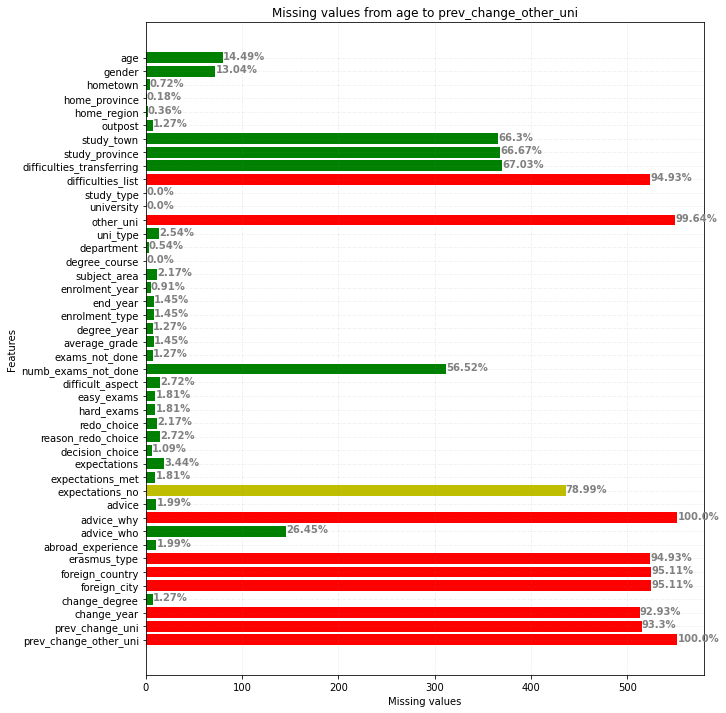

0 44


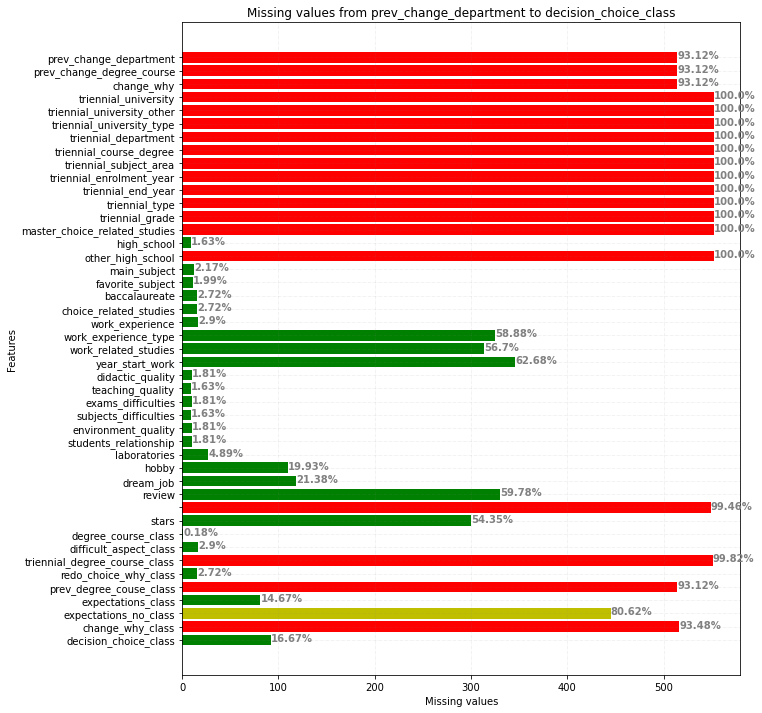

44 89


In [2185]:
#creazione del grafico
start=0
for i in range(2, 0, -1):
  fig, ax = plt.subplots(figsize =(10, 12))
  end= int(len(index)/i)
  title_str=f'Missing values from {index[start]} to {index[end-1]}'
  # Horizontal Bar Plot
  ax.barh(index[start:end], values[start:end], color=clrs[start:end])
  # Add x, y gridlines
  ax.grid(b = True, color ='grey',
          linestyle ='-.', linewidth = 0.5,
          alpha = 0.2)
  # Add annotation to bars
  for i in ax.patches:
      plt.text(i.get_width()+0.2, i.get_y()+0.5,
              str(round(((i.get_width()/tot_triennial_students)*100), 2))+'%',
              fontsize = 10, fontweight ='bold',
              color ='grey') 
  # Show top values
  ax.invert_yaxis()
  #labeling
  plt.xlabel("Missing values")
  plt.ylabel("Features")
  plt.title(title_str)
  plt.show()
  print(start, end)
  start=end

##LAUREATI TRIENNALE E MAGISTRALE A CICLO UNICO:grafico valori mancanti

In [2186]:
#definizione delle variabili
df_graduate_triennial_degree = df_graduate.query('study_type == "Triennale" | study_type == "Magistrale_unico"')
tot_triennial_graduate=df_graduate_triennial_degree.shape[0]
print(tot_triennial_graduate)

27


In [2187]:
df_missing_value_triennial_degree_graduate=df_graduate_triennial_degree.isnull().sum()
values=df_missing_value_triennial_degree_graduate.values
#print(values)
index=df_missing_value_triennial_degree_graduate.index
#print(index)

In [2188]:
#gestione dei colori
clrs=[]
x_perc_values=[]
for x in values:
  x_perc= (x/tot_triennial_graduate)*100
  if (x_perc<=75):
    clrs.append('g') #green when missing value < 75%
  elif (x_perc>75) and (x_perc<=85):
    clrs.append('y')
  else:
    clrs.append('r')

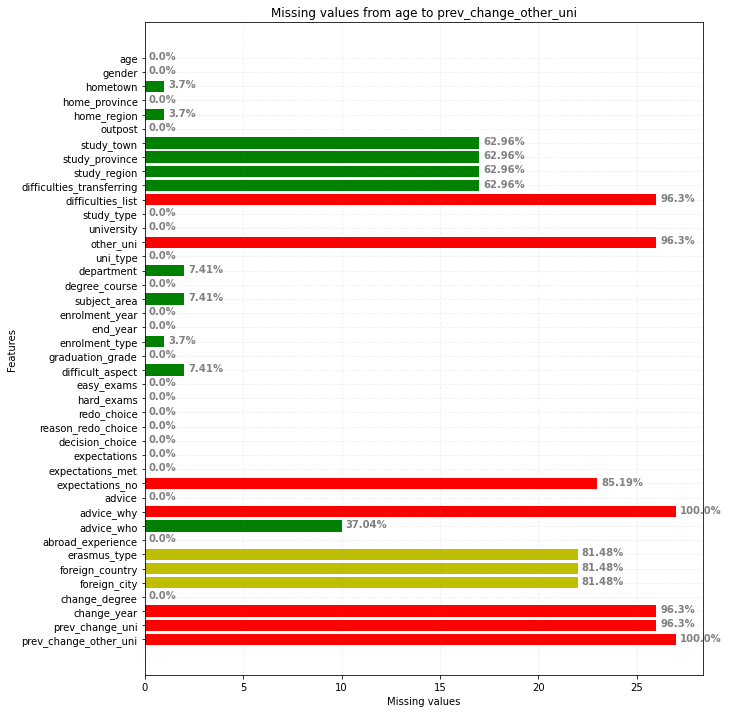

0 42


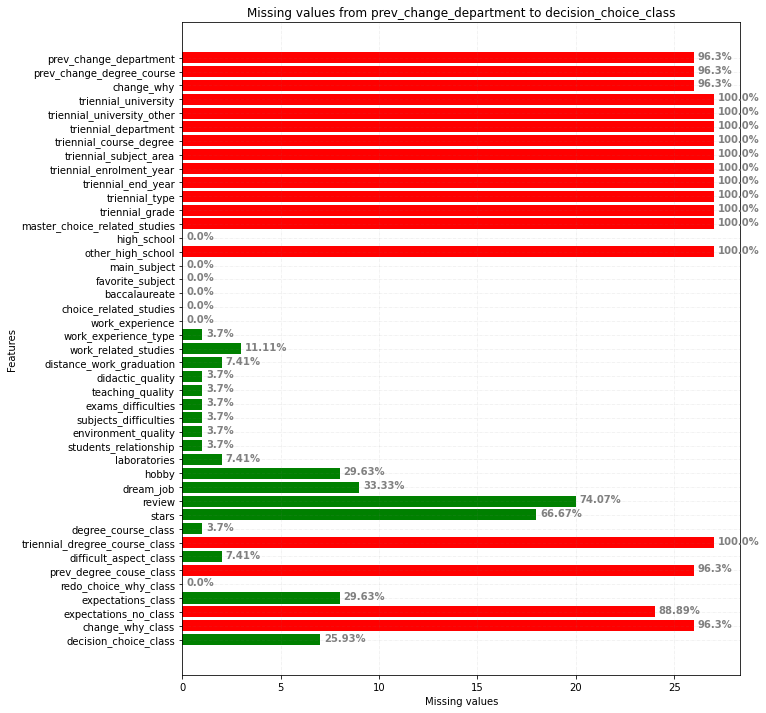

42 85


In [2189]:
#creazione del grafico
start=0
for i in range(2, 0, -1):
  fig, ax = plt.subplots(figsize =(10, 12))
  end= int(len(index)/i)
  title_str=f'Missing values from {index[start]} to {index[end-1]}'
  # Horizontal Bar Plot
  ax.barh(index[start:end], values[start:end], color=clrs[start:end])
  # Add x, y gridlines
  ax.grid(b = True, color ='grey',
          linestyle ='-.', linewidth = 0.5,
          alpha = 0.2)
  # Add annotation to bars
  for i in ax.patches:
      plt.text(i.get_width()+0.2, i.get_y()+0.5,
              str(round(((i.get_width()/tot_triennial_graduate)*100), 2))+'%',
              fontsize = 10, fontweight ='bold',
              color ='grey') 
  # Show top values
  ax.invert_yaxis()
  #labeling
  plt.xlabel("Missing values")
  plt.ylabel("Features")
  plt.title(title_str)
  plt.show()
  print(start, end)
  start=end

##GESTIONE VALORI MANCANTI

###Colonna high_school -> eliminazione celle nulle

In [2190]:
df_students_first_degree = df_students_first_degree[df_students_first_degree['high_school'].notna()]
df_students_first_degree.shape

(543, 89)

In [2191]:
df_graduate_first_degree = df_graduate_first_degree[df_graduate_first_degree['high_school'].notna()]
df_graduate_first_degree.shape

(27, 85)

###Colonna main_subject

####Studenti

In [2192]:
school_whitout_subject= df_students_first_degree['high_school'].loc[df_students_first_degree['main_subject'].isnull()]

In [2193]:
full_subject=df_students_first_degree['main_subject']
high_school=np.array(df_students_first_degree['high_school'])
for x  in school_whitout_subject:
  subject=np.array(df_students_first_degree['main_subject'].loc[df_students_first_degree['high_school'].str.contains(x,na=False)][0:1])
  for i in range(0, len(high_school)):
    if (high_school[i]==x):
        full_subject[i]=np.array2string(subject)
df_students_first_degree['full_subject']=full_subject

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [2194]:
df_students_first_degree['main_subject']=df_students_first_degree['main_subject'].combine_first(df_students_first_degree['full_subject'])
df_students_first_degree[['main_subject', 'full_subject']].head(50)

,main_subject,full_subject
0,"Scienze,matematica,informatica","['Scienze,matematica,informatica']"
1,"matematica,fisica,scienze","['Scienze,matematica,informatica']"
2,"Greco, latino,italiano","Greco, latino,italiano"
4,"Latino, greco, italiano","Latino, greco, italiano"
5,"Greco, latino, italiano, letteratura, filosofia.","Greco, latino, italiano, letteratura, filosofia."
6,"Diritto, economia inglese, francese, spagnolo","Diritto, economia inglese, francese, spagnolo"
8,"Latino,greco,italiano,inglese","['Scienze,matematica,informatica']"
10,"Economia, Diritto, Relazioni internazionali, M...","Economia, Diritto, Relazioni internazionali, M..."
11,"Scienze, matematica, fisica","['Scienze,matematica,informatica']"
12,"Matematica,scienze,fisica,chimica","['Scienze,matematica,informatica']"


In [2195]:
#mi piacerebbe trovare il modo di mettere le materie mancanti uguali a quelle di altre scuole superiori
df_students_first_degree = df_students_first_degree[df_students_first_degree['main_subject'].notna()]
df_students_first_degree.shape

(541, 90)

####Laureati

In [2196]:
school_whitout_subject= df_graduate_first_degree['high_school'].loc[df_graduate_first_degree['main_subject'].isnull()]

In [2197]:
full_subject=df_graduate_first_degree['main_subject']
high_school=np.array(df_graduate_first_degree['high_school'])
for x  in school_whitout_subject:
  subject=np.array(df_graduate_first_degree['main_subject'].loc[df_graduate_first_degree['high_school'].str.contains(x,na=False)][0:1])
  for i in range(0, len(high_school)):
    if (high_school[i]==x):
        full_subject[i]=np.array2string(subject)
df_graduate_first_degree['full_subject']=full_subject

In [2198]:
df_graduate_first_degree['main_subject']=df_graduate_first_degree['main_subject'].combine_first(df_graduate_first_degree['full_subject'])
df_graduate_first_degree[['main_subject', 'full_subject']].head(50)

,main_subject,full_subject
0,umanistiche,umanistiche
1,"Spagnolo, inglese, francese, matematica, fisic...","Spagnolo, inglese, francese, matematica, fisic..."
3,"Matematica, chimica, fisica, scienze, storia, ...","Matematica, chimica, fisica, scienze, storia, ..."
4,Lingue,Lingue
6,Materie umanistiche e scientifiche,Materie umanistiche e scientifiche
7,Scienze,Scienze
8,"Latino, greco, italiano, storia, filosofia","Latino, greco, italiano, storia, filosofia"
10,"Geografia economica, diritto, economia azienda...","Geografia economica, diritto, economia azienda..."
11,"Matematica, lettere, fisica","Matematica, lettere, fisica"
12,"Matematica, fisica, latino, italiano, storia","Matematica, fisica, latino, italiano, storia"


In [2199]:
df_graduate_first_degree = df_graduate_first_degree[df_graduate_first_degree['main_subject'].notna()]
df_graduate_first_degree.shape

(27, 86)

###Colonna favorite_subject ->eliminazione celle nulle

In [2200]:
df_students_first_degree = df_students_first_degree[df_students_first_degree['favorite_subject'].notna()]
df_students_first_degree.shape

(538, 90)

In [2201]:
df_graduate_first_degree = df_graduate_first_degree[df_graduate_first_degree['favorite_subject'].notna()]
df_graduate_first_degree.shape

(27, 86)

###Colonna dream_job -> eliminazione celle nulle 

In [2202]:
df_students_first_degree = df_students_first_degree[df_students_first_degree['dream_job'].notna()]
df_students_first_degree.shape

(429, 90)

In [2203]:
df_graduate_first_degree = df_graduate_first_degree[df_graduate_first_degree['dream_job'].notna()]
df_graduate_first_degree.shape

(18, 86)

###Colonna hobby -> eliminazione celle nulle 

In [2204]:
df_students_first_degree = df_students_first_degree[df_students_first_degree['hobby'].notna()]
df_students_first_degree.shape

(407, 90)

In [2205]:
df_graduate_first_degree = df_graduate_first_degree[df_graduate_first_degree['hobby'].notna()]
df_graduate_first_degree.shape

(17, 86)

###Colonna decision_choice -> eliminazione celle nulle

In [2206]:
df_students_first_degree = df_students_first_degree[df_students_first_degree['decision_choice'].notna()]
df_students_first_degree.shape

(406, 90)

In [2207]:
df_graduate_first_degree = df_graduate_first_degree[df_graduate_first_degree['decision_choice'].notna()]
df_graduate_first_degree.shape

(17, 86)

###Colonna expectations -> eliminazione celle nulle 

In [2208]:
df_students_first_degree = df_students_first_degree[df_students_first_degree['expectations'].notna()]
df_students_first_degree.shape

(398, 90)

In [2209]:
df_graduate_first_degree = df_graduate_first_degree[df_graduate_first_degree['expectations'].notna()]
df_graduate_first_degree.shape

(17, 86)

###Colonna choice related studies -> eliminazione celle nulle 

In [2210]:
df_students_first_degree = df_students_first_degree[df_students_first_degree['choice_related_studies'].notna()]
df_students_first_degree.shape

(394, 90)

In [2211]:
df_graduate_first_degree = df_graduate_first_degree[df_graduate_first_degree['choice_related_studies'].notna()]
df_graduate_first_degree.shape

(17, 86)

##PULIZIA E PREPROCESSING COLONNA HIGH SCHOOL

###Unisco le scuole superiori dei due fogli

In [2212]:
#unisco studenti e laureati
all_high_school=df_students_first_degree[['high_school','other_high_school']]
all_high_school=all_high_school.append(df_graduate_first_degree[['high_school','other_high_school']])
all_high_school.shape

(411, 2)

In [2213]:
all_high_school['high_school']=all_high_school['high_school'].replace('altro', np.NaN ) #necessario per effettuare merge tra 2 colonne
#all_high_school['high_school'].head(50)

In [2214]:
all_high_school['high_school']=all_high_school['high_school'].combine_first(all_high_school['other_high_school'])
#all_high_school['high_school'].head(50)

In [2215]:
all_high_school['high_school']=all_high_school['high_school'].replace(np.NaN,'altro') #necessario per effettuare merge tra 2 colonne
#all_high_school['high_school'].head(50)

In [2216]:
all_high_school['clean_high_school']=all_high_school['high_school']

###Cleaning dei dati

In [2217]:
#caratteri speciali
special_char=[',',"’","'",'<', '>', '.', '-', '_', '/', ': ', ' & ']

In [2218]:
#metto in minuscolo
all_high_school['clean_high_school']=all_high_school['clean_high_school'].apply(lambda x: x.lower())
#df_students['high_school'].head(50)

In [2219]:
#rimozione di caratteri speciali
for i in range(0, len(special_char)):
  all_high_school['clean_high_school']=all_high_school['clean_high_school'].str.replace(special_char[i], ' ')
#df_students['high_school'].head(50)

In [2220]:
#eliminazione spazi bianchi prima e dopo una stringa
all_high_school['clean_high_school']=all_high_school['clean_high_school'].str.strip()
#df_students['high_school'].head(50)

In [2221]:
#elimino doppi spazi bianchi
all_high_school['clean_high_school']=all_high_school['clean_high_school'].str.replace('  ', ' ')

In [2222]:
# Split the sentences to lists of words.
all_high_school['clean_high_school'] = all_high_school['clean_high_school'].str.split()
all_high_school['clean_high_school'] 

1                 [liceo, scientifico]
2                    [liceo, classico]
4                    [liceo, classico]
5                    [liceo, classico]
6       [istituto, tecnico, economico]
                    ...               
48    [istituto, tecnico, industriale]
52       [istituto, tecnico, geometri]
54                [liceo, scientifico]
57      [istituto, tecnico, economico]
60                             [ipsia]
Name: clean_high_school, Length: 411, dtype: object

In [2223]:
stop_ita = stopwords.words('italian')
all_high_school['clean_high_school']=all_high_school['clean_high_school'].apply(lambda x: [item for item in x if item not in stop_ita])
#stop_ita

In [2224]:
#stemmer = ItalianStemmer()
#all_high_school['clean_high_school'] = all_high_school['clean_high_school'].apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word.
#df_students['clean_high_school']

In [2225]:
#Ricompongo le frasi
all_high_school['clean_high_school']=all_high_school['clean_high_school'].apply(' '.join)

In [2226]:
unique_high_school=np.unique(all_high_school['clean_high_school'])
print(len(unique_high_school))
print(unique_high_school)

16
['altro' 'ipsia' 'istituto professionale agrario'
 'istituto professionale alberghiero' 'istituto professionale economico'
 'istituto tecnico agrario' 'istituto tecnico alberghiero'
 'istituto tecnico economico' 'istituto tecnico geometri'
 'istituto tecnico industriale' 'liceo artistico' 'liceo classico'
 'liceo linguistico' 'liceo musicale' 'liceo scientifico'
 'liceo scienze umane']


##PULIZIA E PREPROCESSING COLONNA MAIN_SUBJECT

In [2227]:
#caratteri speciali
special_char=[',',"’","'",'<', '>', '.', '-', '_', '/', ': ', ' & ', '"']

###Unisco le materie dei due fogli

In [2228]:
#unisco studenti e laureati
all_subject=df_students_first_degree['main_subject']
all_subject=all_subject.append(df_graduate_first_degree['main_subject'])
all_subject.shape

(411,)

In [2229]:
#lo trasformo in frame se no mi genera dei problemi
all_subject=all_subject.to_frame()
#all_degree_course

In [2230]:
all_subject['clean_subject']=all_subject['main_subject']

###Cleaning dei dati

In [2231]:
#metto in minuscolo
all_subject['clean_subject']=all_subject['clean_subject'].apply(lambda x: x.lower())
#df_students['degree_course'].head(50)

In [2232]:
#rimozione di caratteri speciali
for i in range(0, len(special_char)):
  all_subject['clean_subject']=all_subject['clean_subject'].str.replace(special_char[i], ' ')
all_subject['clean_subject'].head(10)

1                             matematica fisica scienze
2                                greco  latino italiano
4                               latino  greco  italiano
5      greco  latino  italiano  letteratura  filosofia 
6         diritto  economia inglese  francese  spagnolo
8                         latino greco italiano inglese
12                    matematica scienze fisica chimica
14                                economia  informatica
16    matematica  fisica  italiano  chimica scienze ...
17                         matematica  fisica  chimica 
Name: clean_subject, dtype: object

In [2233]:
#rimozione parentesi
all_subject['clean_subject']=all_subject['clean_subject'].str.replace(r'[(]', '')
all_subject['clean_subject']=all_subject['clean_subject'].str.replace(r'[)]', '')
all_subject['clean_subject']=all_subject['clean_subject'].str.replace(']', '')
all_subject['clean_subject']=all_subject['clean_subject'].str.replace('[', '')

In [2234]:
#eliminazione spazi bianchi prima e dopo una stringa
all_subject['clean_subject']=all_subject['clean_subject'].str.strip()
#df_students['degree_course'].head(50)

In [2235]:
#elimino doppi spazi bianchi
all_subject['clean_subject']=all_subject['clean_subject'].str.replace('  ', ' ')

In [2236]:
# Split the sentences to lists of words.
all_subject['clean_subject']= all_subject['clean_subject'].str.split()
all_subject['clean_subject']

1                         [matematica, fisica, scienze]
2                             [greco, latino, italiano]
4                             [latino, greco, italiano]
5     [greco, latino, italiano, letteratura, filosofia]
6      [diritto, economia, inglese, francese, spagnolo]
                            ...                        
48    [matematica, italiano, sistemi, e, reti, tps, ...
52    [costruzioni, topografia, disegno, tecnologia,...
54                                            [scienze]
57                                         [ragioneria]
60    [disegno, per, la, moda, modellistica, e, conf...
Name: clean_subject, Length: 411, dtype: object

In [2237]:
stop_ita = stopwords.words('italian')
all_subject['clean_subject']=all_subject['clean_subject'].apply(lambda x: [item for item in x if item not in stop_ita])
#stop_ita

In [2238]:
stop_en = stopwords.words('english')
all_subject['clean_subject']=all_subject['clean_subject'].apply(lambda x: [item for item in x if item not in stop_en])
#stop_en

In [2239]:
stemmer = ItalianStemmer()
all_subject['clean_subject']=all_subject['clean_subject'].apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word.
#df_students['clean_degree_course'] 

In [2240]:
#Ricompongo le frasi
all_subject['clean_subject']=all_subject['clean_subject'].apply(' '.join)

In [2241]:
#TODO remove fra (codice di prova)
all_subject[['clean_subject','main_subject']].head(50)

,clean_subject,main_subject
1,matemat fisic scienz,"matematica,fisica,scienze"
2,grec latin ital,"Greco, latino,italiano"
4,latin grec ital,"Latino, greco, italiano"
5,grec latin ital letteratur filosof,"Greco, latino, italiano, letteratura, filosofia."
6,diritt econom ingles frances spagnol,"Diritto, economia inglese, francese, spagnolo"
8,latin grec ital ingles,"Latino,greco,italiano,inglese"
12,matemat scienz fisic chimic,"Matematica,scienze,fisica,chimica"
14,econom informat,"Economia, informatica"
16,matemat fisic ital chimic scienz terr latin fi...,"Matematica, fisica, italiano, chimica/scienze ..."
17,matemat fisic chimic,"Matematica, fisica, chimica"


In [2242]:
#preparo per il modello bag of word
all_subject['tokenized_subject'] = all_subject.apply(lambda row: nltk.word_tokenize(row['clean_subject']), axis=1)
all_subject.head(50) #output di prova

,main_subject,clean_subject,tokenized_subject
1,"matematica,fisica,scienze",matemat fisic scienz,"[matemat, fisic, scienz]"
2,"Greco, latino,italiano",grec latin ital,"[grec, latin, ital]"
4,"Latino, greco, italiano",latin grec ital,"[latin, grec, ital]"
5,"Greco, latino, italiano, letteratura, filosofia.",grec latin ital letteratur filosof,"[grec, latin, ital, letteratur, filosof]"
6,"Diritto, economia inglese, francese, spagnolo",diritt econom ingles frances spagnol,"[diritt, econom, ingles, frances, spagnol]"
8,"Latino,greco,italiano,inglese",latin grec ital ingles,"[latin, grec, ital, ingles]"
12,"Matematica,scienze,fisica,chimica",matemat scienz fisic chimic,"[matemat, scienz, fisic, chimic]"
14,"Economia, informatica",econom informat,"[econom, informat]"
16,"Matematica, fisica, italiano, chimica/scienze ...",matemat fisic ital chimic scienz terr latin fi...,"[matemat, fisic, ital, chimic, scienz, terr, l..."
17,"Matematica, fisica, chimica",matemat fisic chimic,"[matemat, fisic, chimic]"


##PULIZIA E PREPROCESSING COLONNA FAVORITE_SUBJECT

In [2243]:
#caratteri speciali
special_char=[',',"’","'",'<', '>', '.', '-', '_', '/', ': ', ' & ']

###Unisco le materie preferite dei due fogli

In [2244]:
#unisco studenti e laureati
all_favorite_subject=df_students_first_degree['favorite_subject']
all_favorite_subject=all_favorite_subject.append(df_graduate_first_degree['favorite_subject'])
all_favorite_subject.shape

(411,)

In [2245]:
#lo trasformo in frame se no mi genera dei problemi
all_favorite_subject=all_favorite_subject.to_frame()

In [2246]:
all_favorite_subject['clean_favorite_subject']=all_favorite_subject['favorite_subject']

###Cleaning dei dati

In [2247]:
#metto in minuscolo
all_favorite_subject['clean_favorite_subject']=all_favorite_subject['clean_favorite_subject'].apply(lambda x: x.lower())

In [2248]:
#rimozione di caratteri speciali
for i in range(0, len(special_char)):
  all_favorite_subject['clean_favorite_subject']=all_favorite_subject['clean_favorite_subject'].str.replace(special_char[i], ' ')
all_favorite_subject['clean_favorite_subject'].head(10)

1           matematica
2     non ne avevo una
4              latino 
5           filosofia 
6              diritto
8                greco
12             scienze
14         informatica
16              fisica
17             chimica
Name: clean_favorite_subject, dtype: object

In [2249]:
#rimozione parentesi
all_favorite_subject['clean_favorite_subject']=all_favorite_subject['clean_favorite_subject'].str.replace(r'[(]', '')
all_favorite_subject['clean_favorite_subject']=all_favorite_subject['clean_favorite_subject'].str.replace(r'[)]', '')

In [2250]:
#eliminazione spazi bianchi prima e dopo una stringa
all_favorite_subject['clean_favorite_subject']=all_favorite_subject['clean_favorite_subject'].str.strip()

In [2251]:
#elimino doppi spazi bianchi
all_favorite_subject['clean_favorite_subject']=all_favorite_subject['clean_favorite_subject'].str.replace('  ', ' ')

In [2252]:
# Split the sentences to lists of words.
all_favorite_subject['clean_favorite_subject']= all_favorite_subject['clean_favorite_subject'].str.split()
all_favorite_subject['clean_favorite_subject']

1                                          [matematica]
2                                 [non, ne, avevo, una]
4                                              [latino]
5                                           [filosofia]
6                                             [diritto]
                            ...                        
48                                         [matematica]
52                                        [costruzioni]
54                                         [matematica]
57                                           [italiano]
60    [disegno, per, la, moda, storia, della, moda, ...
Name: clean_favorite_subject, Length: 411, dtype: object

In [2253]:
stop_ita = stopwords.words('italian')
all_favorite_subject['clean_favorite_subject']=all_favorite_subject['clean_favorite_subject'].apply(lambda x: [item for item in x if item not in stop_ita])
#stop_ita
all_favorite_subject['clean_favorite_subject'].head()

1    [matematica]
2              []
4        [latino]
5     [filosofia]
6       [diritto]
Name: clean_favorite_subject, dtype: object

In [2254]:
stemmer = ItalianStemmer()
all_favorite_subject['clean_favorite_subject']=all_favorite_subject['clean_favorite_subject'].apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word.

In [2255]:
#Ricompongo le frasi
all_favorite_subject['clean_favorite_subject']=all_favorite_subject['clean_favorite_subject'].apply(' '.join)

In [2256]:
#preparo per il modello bag of word
all_favorite_subject['tokenized_favorite_subject'] = all_favorite_subject.apply(lambda row: nltk.word_tokenize(row['clean_favorite_subject']), axis=1)
all_favorite_subject.head(50) #output di prova

,favorite_subject,clean_favorite_subject,tokenized_favorite_subject
1,matematica,matemat,[matemat]
2,Non ne avevo una,,[]
4,Latino,latin,[latin]
5,Filosofia,filosof,[filosof]
6,Diritto,diritt,[diritt]
8,Greco,grec,[grec]
12,Scienze,scienz,[scienz]
14,Informatica,informat,[informat]
16,Fisica,fisic,[fisic]
17,Chimica,chimic,[chimic]


##PULIZIA E PREPROCESSING COLONNA DREAM_JOB

In [2257]:
#caratteri speciali
special_char=[',',"’","'",'<', '>', '.', '-', '_', '/', ': ', ' & ']

###Unisco i lavori sognati dei due fogli

In [2258]:
#unisco studenti e laureati
all_dream_job=df_students_first_degree['dream_job']
all_dream_job=all_dream_job.append(df_graduate_first_degree['dream_job'])
all_dream_job.shape

(411,)

In [2259]:
#lo trasformo in frame se no mi genera dei problemi
all_dream_job=all_dream_job.to_frame()

In [2260]:
all_dream_job['clean_dream_job']=all_dream_job['dream_job']

###Cleaning dei dati

In [2261]:
#metto in minuscolo
all_dream_job['clean_dream_job']=all_dream_job['clean_dream_job'].apply(lambda x: x.lower())

In [2262]:
#rimozione di caratteri speciali
for i in range(0, len(special_char)):
  all_dream_job['clean_dream_job']=all_dream_job['clean_dream_job'].str.replace(special_char[i], ' ')
all_dream_job['clean_dream_job'].head(10)

1                                consulente finanziario
2                                             radiologo
4                    diventare un medico specializzato 
5                         infermiere di sala operatoria
6                            montatrice cinematografica
8                               infermiera strumentista
12            lavorare in ospedale  far nascere bambini
14    il mio sogno é lavorare solo di mattina quindi...
16                ricercatrice o ministro della salute 
17                                       medico interno
Name: clean_dream_job, dtype: object

In [2263]:
#rimozione parentesi
all_dream_job['clean_dream_job']=all_dream_job['clean_dream_job'].str.replace(r'[(]', '')
all_dream_job['clean_dream_job']=all_dream_job['clean_dream_job'].str.replace(r'[)]', '')

In [2264]:
#eliminazione spazi bianchi prima e dopo una stringa
all_dream_job['clean_dream_job']=all_dream_job['clean_dream_job'].str.strip()

In [2265]:
#elimino doppi spazi bianchi
all_dream_job['clean_dream_job']=all_dream_job['clean_dream_job'].str.replace('  ', ' ')

In [2266]:
# Split the sentences to lists of words.
all_dream_job['clean_dream_job']= all_dream_job['clean_dream_job'].str.split()
all_dream_job['clean_dream_job']

1                             [consulente, finanziario]
2                                           [radiologo]
4                [diventare, un, medico, specializzato]
5                    [infermiere, di, sala, operatoria]
6                         [montatrice, cinematografica]
                            ...                        
48             [lavoro, riguardante, la, cybersecurity]
52         [calcio, professionistico, come, allenatore]
54                                             [medico]
57                                   [palestra, salute]
60    [diventare, una, figurinista, di, moda, o, des...
Name: clean_dream_job, Length: 411, dtype: object

In [2267]:
stop_ita = stopwords.words('italian')
all_dream_job['clean_dream_job']=all_dream_job['clean_dream_job'].apply(lambda x: [item for item in x if item not in stop_ita])
#stop_ita

In [2268]:
stemmer = ItalianStemmer()
all_dream_job['clean_dream_job']=all_dream_job['clean_dream_job'].apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word

In [2269]:
#Ricompongo le frasi
all_dream_job['clean_dream_job']=all_dream_job['clean_dream_job'].apply(' '.join)

In [2270]:
#preparo per il modello bag of word
all_dream_job['tokenized_dream_job'] = all_dream_job.apply(lambda row: nltk.word_tokenize(row['clean_dream_job']), axis=1)
all_dream_job.head(50) #output di prova

,dream_job,clean_dream_job,tokenized_dream_job
1,consulente finanziario,consulent finanziar,"[consulent, finanziar]"
2,Radiologo,radiolog,[radiolog]
4,Diventare un medico specializzato,divent medic specializz,"[divent, medic, specializz]"
5,Infermiere di sala operatoria,inferm sal operator,"[inferm, sal, operator]"
6,Montatrice cinematografica,montatric cinematograf,"[montatric, cinematograf]"
8,Infermiera strumentista,infermier strument,"[infermier, strument]"
12,"Lavorare in ospedale, far nascere bambini",lavor ospedal far nasc bambin,"[lavor, ospedal, far, nasc, bambin]"
14,Il mio sogno é lavorare solo di mattina quindi...,sogn è lavor sol mattin quind dipendent comun ...,"[sogn, è, lavor, sol, mattin, quind, dipendent..."
16,Ricercatrice o ministro della salute,ricerc ministr sal,"[ricerc, ministr, sal]"
17,Medico interno,medic intern,"[medic, intern]"


##PULIZIA E PREPROCESSING COLONNA HOBBY

In [2271]:
#caratteri speciali
special_char=[',',"’","'",'<', '>', '.', '-', '_', '/', ': ', ' & ']

###Unisco gli hobby dei due fogli

In [2272]:
#unisco studenti e laureati
all_hobby=df_students_first_degree['hobby']
all_hobby=all_hobby.append(df_graduate_first_degree['hobby'])
all_hobby.shape

(411,)

In [2273]:
#lo trasformo in frame se no mi genera dei problemi
all_hobby=all_hobby.to_frame()

In [2274]:
all_hobby['clean_hobby']=all_hobby['hobby']

###Cleaning dei dati

In [2275]:
#metto in minuscolo
all_hobby['clean_hobby']=all_hobby['clean_hobby'].apply(lambda x: x.lower())

In [2276]:
#rimozione di caratteri speciali
for i in range(0, len(special_char)):
  all_hobby['clean_hobby']=all_hobby['clean_hobby'].str.replace(special_char[i], ' ')
all_hobby['clean_hobby'].head(10)

1                                           videogiochi
2                         ascoltare musica  vedere film
4                                              atletica
5                          musica (batteria)  biliardo 
6                 cinema  viaggi  lettura  arte  musica
8                                     cavalcare correre
12                     caccia musica anatomia settoria 
14                       moto  tennis  ciclismo  gite  
16                                              debate 
17    guardare serie tv  uscire con gli amici  yoga ...
Name: clean_hobby, dtype: object

In [2277]:
#rimozione parentesi
all_hobby['clean_hobby']=all_hobby['clean_hobby'].str.replace(r'[(]', '')
all_hobby['clean_hobby']=all_hobby['clean_hobby'].str.replace(r'[)]', '')

In [2278]:
#eliminazione spazi bianchi prima e dopo una stringa
all_hobby['clean_hobby']=all_hobby['clean_hobby'].str.strip()

In [2279]:
#elimino doppi spazi bianchi
all_hobby['clean_hobby']=all_hobby['clean_hobby'].str.replace('  ', ' ')

In [2280]:
# Split the sentences to lists of words.
all_hobby['clean_hobby']= all_hobby['clean_hobby'].str.split()
all_hobby['clean_hobby']

1                                         [videogiochi]
2                     [ascoltare, musica, vedere, film]
4                                            [atletica]
5                          [musica, batteria, biliardo]
6               [cinema, viaggi, lettura, arte, musica]
                            ...                        
48         [leggere, ascoltare, musica, guardare, film]
52                                    [calcio, lettura]
54                                              [nuoto]
57                                [fotografia, animali]
60    [viaggiare, leggere, tanto, disegnare, moda, e...
Name: clean_hobby, Length: 411, dtype: object

In [2281]:
stop_ita = stopwords.words('italian')
all_hobby['clean_hobby']=all_hobby['clean_hobby'].apply(lambda x: [item for item in x if item not in stop_ita])
#stop_ita

In [2282]:
stemmer = ItalianStemmer()
all_hobby['clean_hobby']=all_hobby['clean_hobby'].apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word

In [2283]:
#Ricompongo le frasi
all_hobby['clean_hobby']=all_hobby['clean_hobby'].apply(' '.join)

In [2284]:
#preparo per il modello bag of word
all_hobby['tokenized_hobby'] = all_hobby.apply(lambda row: nltk.word_tokenize(row['clean_hobby']), axis=1)
all_hobby.head(50) #output di prova

,hobby,clean_hobby,tokenized_hobby
1,videogiochi,videogioc,[videogioc]
2,"Ascoltare musica, vedere film",ascolt music ved film,"[ascolt, music, ved, film]"
4,Atletica,atlet,[atlet]
5,"Musica (batteria), biliardo.",music batter biliard,"[music, batter, biliard]"
6,"Cinema, viaggi, lettura, arte, musica",cinem viagg lettur arte music,"[cinem, viagg, lettur, arte, music]"
8,"Cavalcare,correre",cavalc corr,"[cavalc, corr]"
12,"Caccia,musica,anatomia settoria.",cacc music anatom settor,"[cacc, music, anatom, settor]"
14,"Moto, tennis, ciclismo, gite,",mot tennis ciclism git,"[mot, tennis, ciclism, git]"
16,Debate,deb,[deb]
17,"Guardare serie TV, uscire con gli amici, yoga,...",guard ser tv uscir amic yog cucin legg,"[guard, ser, tv, uscir, amic, yog, cucin, legg]"


##PULIZIA E PREPROCESSING COLONNA DECISION_CHOICE

In [2285]:
#caratteri speciali
special_char=[',',"’","'",'<', '>', '.', '-', '_', '/', ': ', ' & ']

###Unisco le decisioni dei due fogli

In [2286]:
#unisco studenti e laureati
all_decision_choice=df_students_first_degree['decision_choice']
all_decision_choice=all_decision_choice.append(df_graduate_first_degree['decision_choice'])
all_decision_choice.shape

(411,)

In [2287]:
#lo trasformo in frame se no mi genera dei problemi
all_decision_choice=all_decision_choice.to_frame()

In [2288]:
all_decision_choice['clean_decision_choice']=all_decision_choice['decision_choice']

###Cleaning dei dati

In [2289]:
#metto in minuscolo
all_decision_choice['clean_decision_choice']=all_decision_choice['clean_decision_choice'].apply(lambda x: x.lower())

In [2290]:
#rimozione di caratteri speciali
for i in range(0, len(special_char)):
  all_decision_choice['clean_decision_choice']=all_decision_choice['clean_decision_choice'].str.replace(special_char[i], ' ')
all_decision_choice['clean_decision_choice'].head(10)

1     la mia voglia di intraprendere questo percorso...
2                       la predisposizione alla materia
4                ho sempre voluto fare questo mestiere 
5     il desiderio di poter dare una mano a chi ne h...
6                 la mia grande passione per il cinema 
8     cose personali ma anche il forte senso che è i...
12    passione per l anatomia femminile  il parto  l...
14    é un corso giudicato da tutti relativamente fa...
16    il mio interesse per le materie scientifiche  ...
17                                nessuno  ho scelto io
Name: clean_decision_choice, dtype: object

In [2291]:
#rimozione parentesi
all_decision_choice['clean_decision_choice']=all_decision_choice['clean_decision_choice'].str.replace(r'[(]', '')
all_decision_choice['clean_decision_choice']=all_decision_choice['clean_decision_choice'].str.replace(r'[)]', '')

In [2292]:
#eliminazione spazi bianchi prima e dopo una stringa
all_decision_choice['clean_decision_choice']=all_decision_choice['clean_decision_choice'].str.strip()

In [2293]:
#elimino doppi spazi bianchi
all_decision_choice['clean_decision_choice']=all_decision_choice['clean_decision_choice'].str.replace('  ', ' ')

In [2294]:
# Split the sentences to lists of words.
all_decision_choice['clean_decision_choice']= all_decision_choice['clean_decision_choice'].str.split()
all_decision_choice['clean_decision_choice']

1     [la, mia, voglia, di, intraprendere, questo, p...
2                  [la, predisposizione, alla, materia]
4          [ho, sempre, voluto, fare, questo, mestiere]
5     [il, desiderio, di, poter, dare, una, mano, a,...
6          [la, mia, grande, passione, per, il, cinema]
                            ...                        
48                                  [i, miei, genitori]
52    [era, la, prosecuzione, degli, studi, precedenti]
54                                                  [x]
57                                 [il, mio, interesse]
60    [passione, per, la, storia, e, la, storia, del...
Name: clean_decision_choice, Length: 411, dtype: object

In [2295]:
stop_ita = stopwords.words('italian')
all_decision_choice['clean_decision_choice']=all_decision_choice['clean_decision_choice'].apply(lambda x: [item for item in x if item not in stop_ita])
#stop_ita

In [2296]:
stemmer = ItalianStemmer()
all_decision_choice['clean_decision_choice']=all_decision_choice['clean_decision_choice'].apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word

In [2297]:
#Ricompongo le frasi
all_decision_choice['clean_decision_choice']=all_decision_choice['clean_decision_choice'].apply(' '.join)

In [2298]:
#preparo per il modello bag of word
all_decision_choice['tokenized_decision_choice'] = all_decision_choice.apply(lambda row: nltk.word_tokenize(row['clean_decision_choice']), axis=1)
all_decision_choice.head(50) #output di prova

,decision_choice,clean_decision_choice,tokenized_decision_choice
1,la mia voglia di intraprendere questo percorso...,vogl intraprend percors stud,"[vogl, intraprend, percors, stud]"
2,La predisposizione alla materia,predisposizion mater,"[predisposizion, mater]"
4,Ho sempre voluto fare questo mestiere,sempr vol far mest,"[sempr, vol, far, mest]"
5,Il desiderio di poter dare una mano a chi ne h...,desider poter dar man bisogn,"[desider, poter, dar, man, bisogn]"
6,La mia grande passione per il cinema,grand passion cinem,"[grand, passion, cinem]"
8,Cose personali ma anche il forte senso che è i...,cos personal fort sens me aiut prossim,"[cos, personal, fort, sens, me, aiut, prossim]"
12,"Passione per l’anatomia femminile, il parto, l...",passion anatom femminil part gestazion,"[passion, anatom, femminil, part, gestazion]"
14,É un corso giudicato da tutti relativamente fa...,è cors giudic relat facil poi è line lavor vol...,"[è, cors, giudic, relat, facil, poi, è, line, ..."
16,"Il mio interesse per le materie scientifiche, ...",interess mater scientif percors precedent lice...,"[interess, mater, scientif, percors, precedent..."
17,"Nessuno, ho scelto io",nessun scelt,"[nessun, scelt]"


##PULIZIA E PREPROCESSING COLONNA EXPECTATIONS

In [2299]:
#caratteri speciali
special_char=[',',"’","'",'<', '>', '.', '-', '_', '/', ': ', ' & ']

###Unisco le aspettative dei due fogli

In [2300]:
#unisco studenti e laureati
all_expectations=df_students_first_degree['expectations']
all_expectations=all_expectations.append(df_graduate_first_degree['expectations'])
all_expectations.shape

(411,)

In [2301]:
#lo trasformo in frame se no mi genera dei problem
all_expectations=all_expectations.to_frame()

In [2302]:
all_expectations['clean_expectations']=all_expectations['expectations']

###Cleaning dei dati

In [2303]:
#metto in minuscolo
all_expectations['clean_expectations']=all_expectations['clean_expectations'].apply(lambda x: x.lower())

In [2304]:
#rimozione di caratteri speciali
for i in range(0, len(special_char)):
  all_expectations['clean_expectations']=all_expectations['clean_expectations'].str.replace(special_char[i], ' ')
all_expectations['clean_expectations'].head(10)

1                                quello che sto vivendo
2                 di riuscire a proseguire con facilità
4     sicuramente lungo e faticoso ma spero soddisfa...
5     tutto quello che ho effettivamente incontrato ...
6     mi aspettavo di riuscire ad imparare un mestie...
8     tanto e spero che le aspettative vengano con i...
12                                       imparare molto
14    più difficoltà  nel senso  mi era stato detto ...
16    mi aspettavo forse un ambiente più accogliente...
17    maggiore organizzazione e attenzione allo stud...
Name: clean_expectations, dtype: object

In [2305]:
#rimozione parentesi
all_expectations['clean_expectations']=all_expectations['clean_expectations'].str.replace(r'[(]', '')
all_expectations['clean_expectations']=all_expectations['clean_expectations'].str.replace(r'[)]', '')

In [2306]:
#eliminazione spazi bianchi prima e dopo una stringa
all_expectations['clean_expectations']=all_expectations['clean_expectations'].str.strip()

In [2307]:
#elimino doppi spazi bianchi
all_expectations['clean_expectations']=all_expectations['clean_expectations'].str.replace('  ', ' ')

In [2308]:
# Split the sentences to lists of words.
all_expectations['clean_expectations']= all_expectations['clean_expectations'].str.split()
all_expectations['clean_expectations']

1                           [quello, che, sto, vivendo]
2          [di, riuscire, a, proseguire, con, facilità]
4     [sicuramente, lungo, e, faticoso, ma, spero, s...
5     [tutto, quello, che, ho, effettivamente, incon...
6     [mi, aspettavo, di, riuscire, ad, imparare, un...
                            ...                        
48          [un, approccio, metodologico, ai, problemi]
52                           [quello, che, ho, trovato]
54                                                  [x]
57                   [più, pratica, ma, va, bene, così]
60                 [materie, più, attinenti, al, corso]
Name: clean_expectations, Length: 411, dtype: object

In [2309]:
stop_ita = stopwords.words('italian')
all_expectations['clean_expectations']=all_expectations['clean_expectations'].apply(lambda x: [item for item in x if item not in stop_ita])
#stop_ita

In [2310]:
stemmer = ItalianStemmer()
all_expectations['clean_expectations']=all_expectations['clean_expectations'].apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word

In [2311]:
#Ricompongo le frasi
all_expectations['clean_expectations']=all_expectations['clean_expectations'].apply(' '.join)

In [2312]:
#preparo per il modello bag of word
all_expectations['tokenized_expectations'] = all_expectations.apply(lambda row: nltk.word_tokenize(row['clean_expectations']), axis=1)
all_expectations.head(50) #output di prova

,expectations,clean_expectations,tokenized_expectations
1,quello che sto vivendo,viv,[viv]
2,Di riuscire a proseguire con facilità,riusc prosegu facil,"[riusc, prosegu, facil]"
4,Sicuramente lungo e faticoso ma spero soddisfa...,sicur lung fatic sper soddisfacent fin,"[sicur, lung, fatic, sper, soddisfacent, fin]"
5,Tutto quello che ho effettivamente incontrato ...,effett incontr percors fors men mater umanist ...,"[effett, incontr, percors, fors, men, mater, u..."
6,Mi aspettavo di riuscire ad imparare un mestie...,aspett riusc impar mest molt cors pratic,"[aspett, riusc, impar, mest, molt, cors, pratic]"
8,Tanto e spero che le aspettative vengano con i...,tant sper aspett veng temp soddisfatt,"[tant, sper, aspett, veng, temp, soddisfatt]"
12,Imparare molto,impar molt,"[impar, molt]"
14,"Più difficoltà. Nel senso, mi era stato detto ...",difficolt sens stat dett legger pens comunqu u...,"[difficolt, sens, stat, dett, legger, pens, co..."
16,Mi aspettavo forse un ambiente più accogliente...,aspett fors ambient accoglient mater tip chimic,"[aspett, fors, ambient, accoglient, mater, tip..."
17,Maggiore organizzazione e attenzione allo stud...,maggior organizz attenzion student esigt student,"[maggior, organizz, attenzion, student, esigt,..."


##PULIZIA E FEATURES ENGINERING COLONNA CHOICE_RELATED_STUDIES

###Unisco le decisioni  dei due fogli

In [2313]:
#unisco studenti e laureati
all_choices=df_students_first_degree['choice_related_studies']
all_choices=all_choices.append(df_graduate_first_degree['choice_related_studies'])
all_choices.shape

(411,)

In [2314]:
#lo trasformo in frame se no mi genera dei problem
all_choices=all_choices.to_frame()

In [2315]:
all_choices['clean_choices']=all_choices['choice_related_studies']

###Cleaning dei dati

In [2316]:
all_choices['clean_choices']=all_choices['clean_choices'].apply(lambda x: x.lower())

##FEATURES ENGINEERING

###Caratteristiche nominali -> choice_related_studies

In [2317]:
encoder = LabelEncoder()
genre_labels = encoder.fit_transform(all_choices['clean_choices']) #all_choice è il dataframe che ho pulito prima
genre_mappings = {index: label for index, label in enumerate(gle.classes_)}
genre_mappings

{0: 'NO', 1: 'SI'}

In [2318]:
 all_choices['clean_choices'] = genre_labels
 all_choices

,choice_related_studies,clean_choices
1,NO,0
2,NO,0
4,NO,0
5,NO,0
6,NO,0
...,...,...
48,SI,1
52,SI,1
54,SI,1
57,NO,0


# DATI MAGISTRALI

In [ ]:
df_students_second_degree = df_students.query('study_type == "Magistrale"')
#df_students_second_degree
df_students_second_degree.shape

In [ ]:
df_graduate_second_degree = df_graduate.query('study_type == "Magistrale"')
#df_graduate_second_degree
df_graduate_second_degree.shape

# CODICE DI BRUTTA

In [ ]:
#numero di colonne con valori mancanti
print("Columns with Missing Values:",df_subject_area_analysis.columns[df_subject_area_analysis.isnull().any()].tolist())

In [ ]:
#numero di righe con valori mancanti
print("Number of rows with Missing Values::",df_subject_area_analysis.isnull().any(axis = 1).sum()) #???

In [ ]:
#stampa le righe con valori mancanti
null_data = df_subject_area_analysis[df_subject_area_analysis.isnull().any(axis=1)]
null_data

In [ ]:
#university = np.unique(df_subject_area_analysis['university'])
#print("Università presenti:", len(university))
#print(university)

https://pythoninoffice.com/use-fuzzy-string-matching-in-pandas/
https://stackoverflow.com/questions/13636848/is-it-possible-to-do-fuzzy-match-merge-with-python-pandas
https://www.youtube.com/watch?v=uxHnMG1Jz00
https://towardsdatascience.com/fuzzywuzzy-find-similar-strings-within-one-column-in-a-pandas-data-frame-99f6c2a0c212

In [ ]:
#!pip install fuzzywuzzy
#from fuzzywuzzy import fuzz
#from fuzzywuzzy import process
#df_subject_area_analysis_1 =df_subject_area_analysis.copy()
#df_subject_area_analysis_1
#matches= df_subject_area_analysis['degree_course'].apply(lambda x: process.extractOne(x, df_subject_area_analysis_1['degree_course'].to_list(),score_cutoff=80))
#df_subject_area_analysis[['degree_course']]

In [ ]:
#df=pd.DataFrame(list(matches), columns=['degree', 'match'])
#df

In [ ]:
#df_subject_area_analysis['degree_course']=df['degree']
#df_subject_area_analysis['degree_course']

https://stackoverflow.com/questions/49716597/group-similar-words-sentences-in-pandas-column